# Chapter 6 Roots: Open Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 6.1 Simple Fixed Point Iteration

$$ x_{n+1}=f(x_{n}),\,n=0,1,2,\dots  $$
which gives rise to the sequence ${\displaystyle x_{0},x_{1},x_{2},\dots }x_{0},x_{1},x_{2},\dots $  which is hoped to converge to a point ${\displaystyle x}$. If ${\displaystyle f}$ is continuous, then one can prove that the obtained ${\displaystyle x}$ is a fixed point of $f$, i.e.,

$$ {\displaystyle f(x)=x.\,}$$

### Example 6.1  

$\exp(-x) = x$

Using simple fixed point iteration to locate the root of 

$ x = e^{-x} = f(x) $

1 1
2 0.36787944117144233
3 0.6922006275553464
4 0.5004735005636368
5 0.6062435350855974
6 0.545395785975027
7 0.5796123355033789
8 0.5601154613610891
9 0.571143115080177
10 0.5648793473910495
11 0.5684287250290607
12 0.5664147331468833
13 0.5675566373282834


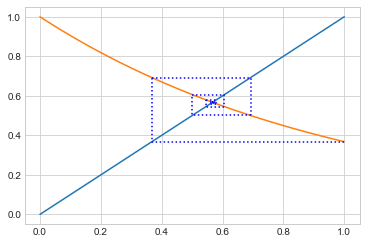

In [2]:
# x = 1
# while 1:
#     xold = x
#     x = np.exp(-x)
#     print(x)
#     if np.abs(x-xold) < 0.001:
#         break
        

x = np.linspace(0, 1)
plt.plot(x,x, x,np.exp(-x))

x = 1
k = 0
while 1:
    k += 1
    print(k, x)
    xold = x
    x = np.exp(-x)
    plt.plot([xold, x, x,], [x, x, np.exp(-x)], 'b:')
    if np.abs(x-xold) < 1.0e-3:
        break
plt.show()

In [3]:
def fixed_point_iteration(fun, x, tol=1e-6, ishow=False, iprint=False):
    k = 0
    while 1:
        k += 1
        if iprint: print(k, x)
        xold = x
        x = fun(x)
        if ishow:
            plt.plot([xold, x, x,], [x, x, fun(x)], 'b')
        if np.abs(x-xold) < tol*np.max([np.abs(x+xold), 1]):            
            if ishow: plt.show()
            return x

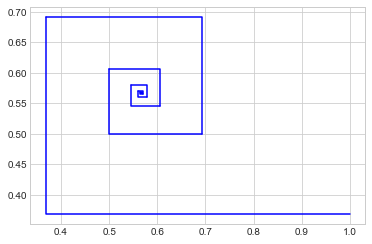

0.5671430308342419

In [4]:
x = fixed_point_iteration(lambda x: np.exp(-x), 1, tol=1e-6, iprint=False, ishow=True)
x

## 6.2 Newton Raphson

The equation of the tangent line to the curve $y = f (x)$ at $x = x_n$ is

$$ {\displaystyle y=f'(x_{n})\,(x-x_{n})+f(x_{n}),}$$
where $f'$ denotes the derivative. The $x$-intercept of this line (the value of $x$ which makes $y = 0$) is taken as the next approximation, $x_{n + 1}$, to the root, so that the equation of the tangent line is satisfied when ${\displaystyle (x,y)=(x_{n+1},0)}$ 

$$ {\displaystyle 0=f'(x_{n})\,(x_{n+1}-x_{n})+f(x_{n}).}$$
Solving for $x_{n + 1}$ gives

$$ {\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}.}$$

### Practical considerations

- Difficulty in calculating derivative of a function
- Failure of the method to converge to the root
- Overshoot
- Stationary point
- Poor initial estimate
- Mitigation of non-convergence
- Slow convergence for roots of multiplicity greater than 1

In [5]:
def newton_raphson_with_derivative(fun, dfun, x0, tol=1.0e-6):
    x = x0
    k = 0
    while 1:
        k += 1
        xold = x
        f = fun(x)
        df = dfun(x)
        x = x - f/df
        print(k, x)
        if np.abs(x-xold) < tol*np.max([np.abs(x+xold), 1]): 
            return x, k

### Example 6.2  
Using Newton Raphson method to locate the root of  

$ f(x) = e^{-x} - x $

In [28]:
x, k = newton_raphson_with_derivative(
    lambda x: np.exp(-x) - x, lambda x: -np.exp(-x) - 1, 100)

x, k

1 0.0
2 0.5
3 0.5663110031972182
4 0.5671431650348622
5 0.5671432904097811


(0.5671432904097811, 5)

### Example 6.3
Slowly converging function with Newton Raphson

$ f(x) = x^{10} - 1 $

In [7]:
x, k = newton_raphson_with_derivative(lambda x: x**10 - 1, lambda x: 10*x**9, 0.5)
x, k

1 51.65
2 46.485
3 41.8365
4 37.65285
5 33.887565
6 30.498808500000003
7 27.44892765000001
8 24.70403488500002
9 22.233631396500048
10 20.010268256850118
11 18.0092414311653
12 16.208317288049273
13 14.587485559245641
14 13.12873700332442
15 11.815863303000608
16 10.634276972722821
17 9.570849275508033
18 8.613764348105635
19 7.752387913678128
20 6.977149123299052
21 6.279434213521248
22 5.6514907987565435
23 5.086341735884172
24 4.577707606184198
25 4.119936958849513
26 3.707943555369608
27 3.337149954580646
28 3.0034369072551246
29 2.703098244970869
30 2.4328013995422957
31 2.1895547592239963
32 1.9706857398116153
33 1.7738402370975677
34 1.5970313479695077
35 1.4388079314270286
36 1.298711342726572
37 1.1783547156201677
38 1.0833497535128551
39 1.0236646611841937
40 1.002316024177411
41 1.0000239342908355
42 1.0000000025776001
43 1.0


(1.0, 43)

### divide and average
old time method for approximating the square root of any positive number $a.$

Consider $f(x) = x^n - a$, then $df/dx = n x^{n-1}$. The Newton Raphson method gives

$$x_{i+1} = x_i - \frac{x_i^n - a}{n x_i^{n-1}} = \frac{1}{n} \left [ (n-1) x_i + \frac{a}{x_i^{n-1}} \right ]$$

For $n = 2$

$$ x_{i+1} = \frac{x_i + a/x_i }{2}$$

In [8]:
def square_root(a, tol=1e-6):    
    x = a/2
    while 1:
        xold = x
        x = (x + a/x)/2
        if np.abs(x-xold) < tol*np.abs(x):
            return x

In [9]:
a = 3
square_root(a), np.sqrt(a)

(1.7320508075688772, 1.7320508075688772)

## 6.3 Secant method

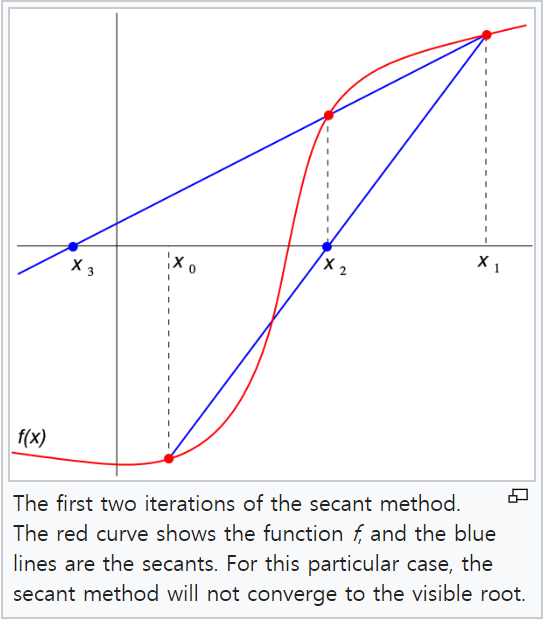

$$ x_{i+1} = x_i - \frac{f(x_i )}{f'(x_i )}$$

$$ f'(x_i ) \cong  \frac{f(x_{i-1}) - f(x_i)}{x_{i-1} - x_i}$$ 

$$ x_{i+1} = x_i - \frac{f(x_i ) (x_{i-1} - x_i )}{f(x_{i-1}) - f(x_i)}$$

In [10]:
def secant(fun, x1, x2=None, tol=1e-6, kmax=100):    
    if x2 == None: 
        x2 = 1.1*x1
    f1, f2 = fun(x1), fun(x2)
    for k in range(kmax):
        x3 = x2 - f2*(x1 - x2)/(f1 - f2)
        f3 = fun(x3)
#         print(x3)
        if np.abs(x2 - x3) < tol*np.abs(x2 + x3):
            return x3
        x1, f1 = x2, f2
        x2, f2 = x3, f3
    return None

In [11]:
def fun(x): return x**2 - 2
x = secant(fun, 1)
x

1.4142135623480703

**Modified secant method**

$$f'(x_i ) = \frac{f(x_i + dx)-f(x_i)}{dx}$$


In [12]:
def modified_secant(func, x, dx=0.1, tol=1e-6, kmax=100):    
    for k in range(kmax):
        xold = x
        f = func(x)
        df = (func(x+dx) - f)/dx
        x = x - f/df        
        if np.abs((x - xold)/x) < tol:
            return x, k        

### Example 6.4 - 6.5  
Determine the mass of the bungee jumper with the drag coefficient of 0.25 kg/m to have a velocity of 36 m/s after 4 s of free fall.

In [13]:
def free_fall(t, m, cd, g=9.81):
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m) * t) 
    return v

In [14]:
t, v, cd = 4.2, 36, 0.25
fun = lambda m: free_fall(t, m, cd) - v
m1 = secant(fun, 50)
m2 = modified_secant(fun, 50)
print(m1)
print(m2)

96.94914940448596
(96.94914939717373, 4)


## 6.4 Hybrid method - brent method

reliability of bracketing method + speed of the open method

bisection + secant + interpolation

In [15]:
def brent(fun, a, b, tol=1e-6, kmax=100, delta=1e-5):
    
    fa, fb = fun(a), fun(b)
    if fa*fb >= 0:
        print('root is not bracketed')
        return None
    if fa < fb:
        a, b, fa, fb = b, a, fb, fa
    
    c = a
    mflag = True
    for k in range(kmax):        
        
        if np.abs(b-a) < tol*np.max([np.abs(b+a),1]): return b
        
        fc = fun(c)
        
        print(mflag)
        print("{:5d}{:15.5f}{:15.5f}{:15.5f}".format(k, a,c,b))
        
        if fa != fc and fb != fc: # interpolation
            print('interpolation')
            s = a*fb*fc/((fa-fb)*(fa-fc)) + b*fc*fa/((fb-fa)*(fb-fc)) + c*fa*fb/((fc-fb)*(fc-fa))
            fs = fun(s)
        else: # secant
            print('secant')
            s = b - fb*(b-a)/(fb-fa)
            fs = fun(s)
            
        if ( ( not ( (3*a + b)/4 < s < b ) ) or 
             ( mflag     and np.abs(s-b) >= np.abs(b-c)/2 ) or 
             ( not mflag and np.abs(s-b) >= np.abs(c-d)/2 ) or 
             ( mflag     and np.abs(b-d) < delta ) or
             ( not mflag and np.abs(c-d) < delta ) ):
            
            s = (a+b)/2
            fs = fun(s)
            mflag = True # if the previous step used the bisection method 
            
        else:            
            mflag = False # If the previous step performed interpolation
        
        d = c
        c, fc = b, fb
        if fa*fs < 0: b, fb = s, fs
        else:         a, fa = s, fs        
        if np.abs(fa) < np.abs(fb): a, b, fa, fb = b, a, fb, fa

In [16]:
def fun(x): return x**2 - 2
brent(fun, 1, 2)

True
    0        2.00000        2.00000        1.00000
secant
True
    1        1.00000        1.00000        1.50000
secant
False
    2        1.50000        1.50000        1.40000
secant
True
    3        1.45000        1.40000        1.40000
secant
True
    4        1.40000        1.40000        1.42500
secant
False
    5        1.42500        1.42500        1.41416
secant
True
    6        1.41958        1.41416        1.41416
secant
True
    7        1.41687        1.41416        1.41416
secant
True
    8        1.41551        1.41416        1.41416
secant
True
    9        1.41484        1.41416        1.41416
secant
True
   10        1.41450        1.41416        1.41416
secant
True
   11        1.41433        1.41416        1.41416
secant
True
   12        1.41416        1.41416        1.41424
secant
False
   13        1.41424        1.41424        1.41421
secant
True
   14        1.41423        1.41421        1.41421
secant
True
   15        1.41422        1.41421        1.41

1.4142135617893559

## 6.5 Python Function

**scipy.optimize**

Scalar functions

>brentq(f, a, b[, args, xtol, rtol, maxiter, ...])	Find a root of a function in a bracketing interval using Brent’s method.

>bisect(f, a, b[, args, xtol, rtol, maxiter, ...])	Find root of a function within an interval.

>newton(func, x0[, fprime, args, tol, ...])	Find a zero using the Newton-Raphson or secant method.

>fixed_point(func, x0[, args, xtol, maxiter, ...])	Find a fixed point of the function.

Multidimensional
>root(fun, x0[, args, method, jac, tol, ...])	Find a root of a vector function.

>fsolve(func, x0[, args, fprime, ...])	Find the roots of a function.


In [17]:
from scipy.optimize import brentq, bisect, newton

def free_fall(t, m, cd, g=9.81):
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m) * t) 
    return v

func = lambda m: free_fall(4, m, 0.25) - 36
m1 = brentq(func, 50, 150)
m2 = bisect(func, 50, 150)
m3 = newton(func, 100)
m4 = secant(func, 100)
print(m1, m2, m3, m4)

142.73763310844924 142.73763310844885 142.73763310844942 142.73763310844402


## 6.6 Polynomial

$$ c_0 x^n + c_1 x^{n-1} + \cdots + c_{n-1} x + c_n$$

- poly1d(c_or_r[, r, variable]) : A one-dimensional polynomial class.
- polyval(p, x) : Evaluate a polynomial at specific values.
- poly(seq_of_zeros) : Find the coefficients of a polynomial with the given sequence of roots.
- roots(p) : Return the roots of a polynomial with coefficients given in p.

Fitting
- polyfit(x, y, deg[, rcond, full, w, cov]) : Least squares polynomial fit.

Calculus
- polyder(p[, m]) : Return the derivative of the specified order of a polynomial.
- polyint(p[, m, k]) : Return an antiderivative (indefinite integral) of a polynomial.

Arithmetic
- polyadd(a1, a2) : Find the sum of two polynomials.
- polydiv(u, v) : Returns the quotient and remainder of polynomial division.
- polymul(a1, a2) : Find the product of two polynomials.
- polysub(a1, a2) : Difference (subtraction) of two polynomials.

-0.53136 -0.53136


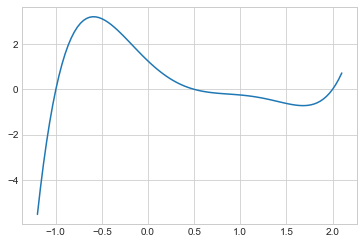

In [18]:
#%% example 6.8 : evaluate at x
# p(x) = 1.25 − 3.875 x + 2.125 x^2 + 2.75 x^3 − 3.5 x^4 + x^5
a = [1, -3.5, 2.75, 2.125, -3.875, 1.25]
x = np.linspace(-1.2, 2.1, 100)
y = np.polyval(a, x)
plt.plot(x, y)

# evaluate 

# Horner method
def horner(p, x):
    n = len(p)
    r = p[0]
    for i in range(1,n):
        r = p[i] + x*r
    return r

print(horner(a, 1.4), np.polyval(a, 1.4))    

In [19]:
# roots of polynomial
x = np.roots(a)
x

array([ 2. +0.j , -1. +0.j ,  1. +0.5j,  1. -0.5j,  0.5+0.j ])

In [20]:
#%% (x - 0.5)(x + 1) = x^2 + 0.5*x - 0.5
print( np.poly([0.5, -1]))

[ 1.   0.5 -0.5]


In [21]:
#%% q, r = a / b
a = [1, -3.5, 2.75, 2.125, -3.875, 1.25]
b = [1, 0.5, -0.5]

q, r = np.polydiv(a, b)
print(q)
print(r)

x = np.roots(q)
print(x)

[ 1.   -4.    5.25 -2.5 ]
[0.]
[2.+0.j  1.+0.5j 1.-0.5j]


In [22]:
#%% 
print(np.polymul(q, b))
print(a)

[ 1.    -3.5    2.75   2.125 -3.875  1.25 ]
[1, -3.5, 2.75, 2.125, -3.875, 1.25]


In [23]:
# determine all roots
x = np.roots(a)
print(x)

[ 2. +0.j  -1. +0.j   1. +0.5j  1. -0.5j  0.5+0.j ]


### Case Study 6.7  Darcy friction factor formulae

$$h_L = f \frac{L}{D} \frac{V^2}{2 g}$$

$$ Re = \frac{\rho V D}{\mu} \quad RR = \frac{\epsilon}{D}$$

Colebrook 
$$ {\displaystyle {\frac {1}{\sqrt {f}}}=-2\log \left({\frac {\varepsilon }{3.7D_{\mathrm {h} }}}+{\frac {2.51}{\mathrm {Re} {\sqrt {f}}}}\right)} $$
Haaland
$$ {\displaystyle {\frac {1}{\sqrt {f}}}=-1.8\log \left[\left({\frac {\varepsilon /D}{3.7}}\right)^{1.11}+{\frac {6.9}{\mathrm {Re} }}\right]} $$

In [24]:
def moody(Re, RR=0, tol=1e-6):
    if Re < 2300: 
        return 64/Re
    x = -1.8*np.log10((RR/3.7)**(1.11) + 6.9/Re)
    b = RR/3.7
    a = 2.51/Re
    while 1:
        xold = x
        x = -2*np.log10(a*x + b)
        if np.abs(x-xold) < tol*np.abs(x):
            return 1/x**2

In [25]:
rho, mu = 1.23, 1.79e-5  # air
D, V, e = 0.005, 40, 0.0015e-3 # diameter, velocity, roughness
Re = rho*V*D/mu # Reynolds number
RR = e/D # relative roughness
Re, RR, moody(Re, RR)

(13743.016759776536, 0.00030000000000000003, 0.02896780887004342)

$$ V_d^2 A_d \rho - V_u^2 A_d \rho - V_b^2 A_b \rho \cos \beta  = (p_u - p_d ) A_d$$

$$ p_{loss} = \frac{V_d^2 \rho}{2} \left [  1 - \left ( \frac{V_u}{V_d} \right )^ 2 \right ] $$

$$ p_{loss} = \frac{V_d^2 \rho}{2} \left [  1.5 \left ( \frac{A_d}{A_b} \right )^ 2 - 1\right ] $$
